In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from datetime import date
from datetime import timedelta

from yahoofinancials import YahooFinancials

from scipy.stats import norm

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation

import warnings
warnings.filterwarnings('ignore')

In [2]:
end = '2021-08-11'
start = '2016-07-20'

In [3]:
stock_symbol = 'TCS.NS'

yf = YahooFinancials(stock_symbol)
data = yf.get_historical_price_data(start, end, 'daily')
TCS = pd.DataFrame(data['TCS.NS']['prices'])
TCS = TCS.drop('date', axis=1).set_index('formatted_date')

TCS['Date'] = pd.to_datetime(TCS.index, format="%Y-%m-%d")
TCS.set_index('Date', drop=False, inplace=True)

df = TCS.dropna()

In [4]:
# df = pd.read_csv('../tata.csv')

In [5]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']
df.head()

,high,low,open,close,volume,adjclose,Date
Date,,,,,,,
2016-07-20,1251.250000,1224.074951,1225.000000,1247.474976,2815252.0,1129.042114,2016-07-20
2016-07-21,1259.750000,1232.224976,1244.750000,1253.025024,2527148.0,1134.065430,2016-07-21
2016-07-22,1262.000000,1246.000000,1249.449951,1257.550049,1517216.0,1138.160645,2016-07-22
2016-07-25,1281.599976,1252.900024,1256.000000,1279.474976,1688796.0,1161.004517,2016-07-25
2016-07-26,1284.000000,1266.500000,1279.474976,1276.300049,2311290.0,1158.123901,2016-07-26


In [6]:
df.shape

(1247, 7)

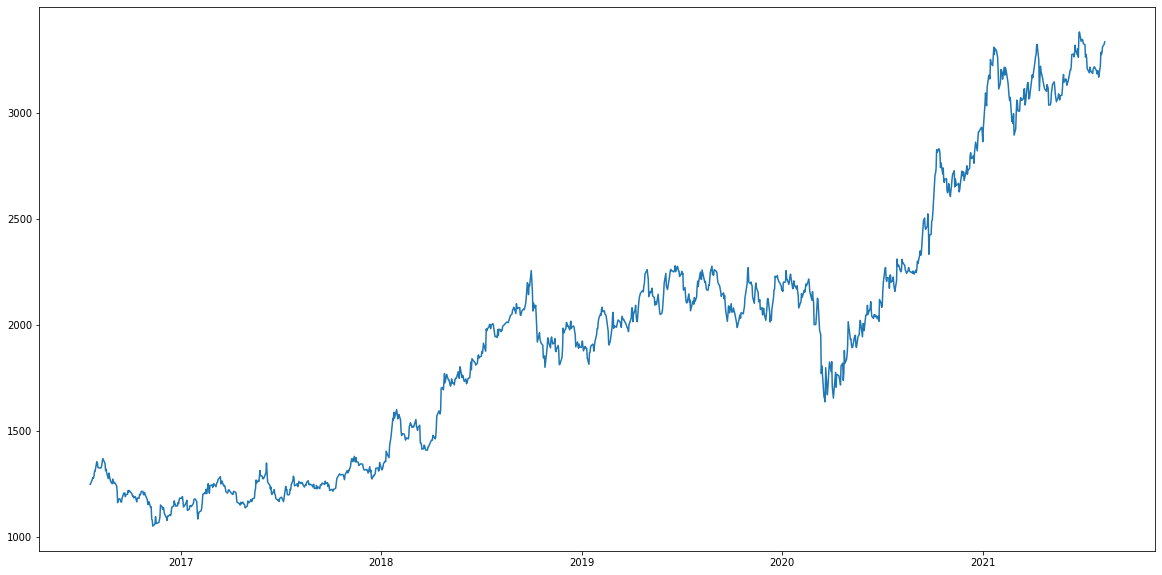

In [7]:
plt.plot(df['close'])

In [8]:
data = df.sort_index(ascending=True, axis=0)

new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_dataset['Date'][i] = data['Date'][i]
    new_dataset['Close'][i] = data['close'][i]

In [9]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

final_dataset=new_dataset.values

In [10]:
trl = int(0.9 * len(df))
look_back = 60

In [11]:
train_data=final_dataset[0:trl,:]
valid_data=final_dataset[trl:,:]

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [13]:
x_train_data,y_train_data=[],[]

for i in range(look_back, trl):
    x_train_data.append(scaled_data[i-look_back:i,0])
    y_train_data.append(scaled_data[i,0])

In [14]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [15]:
TimeSteps=x_train_data.shape[1]
TotalFeatures=x_train_data.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 60
Number of Features: 1


In [16]:
lstm_model=Sequential()

lstm_model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(TimeSteps, TotalFeatures)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=25,activation='relu',return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=25,activation='relu',return_sequences=False))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(1))

In [17]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [18]:
lstm_model.fit(x_train_data,y_train_data,epochs=100,batch_size=32)

Epoch 1/100
34/34 [==============================] - 9s 93ms/step - loss: 0.0568 - accuracy: 9.4162e-04
Epoch 2/100
34/34 [==============================] - 4s 127ms/step - loss: 0.0096 - accuracy: 9.4162e-04
Epoch 3/100
34/34 [==============================] - 4s 123ms/step - loss: 0.0065 - accuracy: 9.4162e-04
Epoch 4/100
34/34 [==============================] - 3s 97ms/step - loss: 0.0068 - accuracy: 9.4162e-04
Epoch 5/100
34/34 [==============================] - 4s 105ms/step - loss: 0.0064 - accuracy: 9.4162e-04
Epoch 6/100
34/34 [==============================] - 3s 95ms/step - loss: 0.0055 - accuracy: 9.4162e-04
Epoch 7/100
34/34 [==============================] - 3s 89ms/step - loss: 0.0059 - accuracy: 9.4162e-04
Epoch 8/100
34/34 [==============================] - 3s 87ms/step - loss: 0.0054 - accuracy: 9.4162e-04
Epoch 9/100
34/34 [==============================] - 4s 104ms/step - loss: 0.0046 - accuracy: 9.4162e-04 loss: 0.0047 - accuracy: 9.76
Epoch 10/100
34/34 [==========

34/34 [==============================] - 3s 102ms/step - loss: 0.0021 - accuracy: 9.4162e-04
Epoch 79/100
34/34 [==============================] - 4s 108ms/step - loss: 0.0020 - accuracy: 9.4162e-04
Epoch 80/100
34/34 [==============================] - 3s 100ms/step - loss: 0.0021 - accuracy: 9.4162e-04
Epoch 81/100
34/34 [==============================] - 4s 118ms/step - loss: 0.0020 - accuracy: 9.4162e-04
Epoch 82/100
34/34 [==============================] - 3s 86ms/step - loss: 0.0021 - accuracy: 9.4162e-04
Epoch 83/100
34/34 [==============================] - 4s 104ms/step - loss: 0.0017 - accuracy: 9.4162e-04
Epoch 84/100
34/34 [==============================] - 3s 95ms/step - loss: 0.0020 - accuracy: 9.4162e-04
Epoch 85/100
34/34 [==============================] - 3s 89ms/step - loss: 0.0020 - accuracy: 9.4162e-04
Epoch 86/100
34/34 [==============================] - 3s 89ms/step - loss: 0.0021 - accuracy: 9.4162e-04
Epoch 87/100
34/34 [==============================] - 3s 92ms/s

In [19]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-look_back:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [20]:
X_test=[]
for i in range(look_back,inputs_data.shape[0]):
    X_test.append(inputs_data[i-look_back:i,0])
X_test=np.array(X_test)

In [21]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

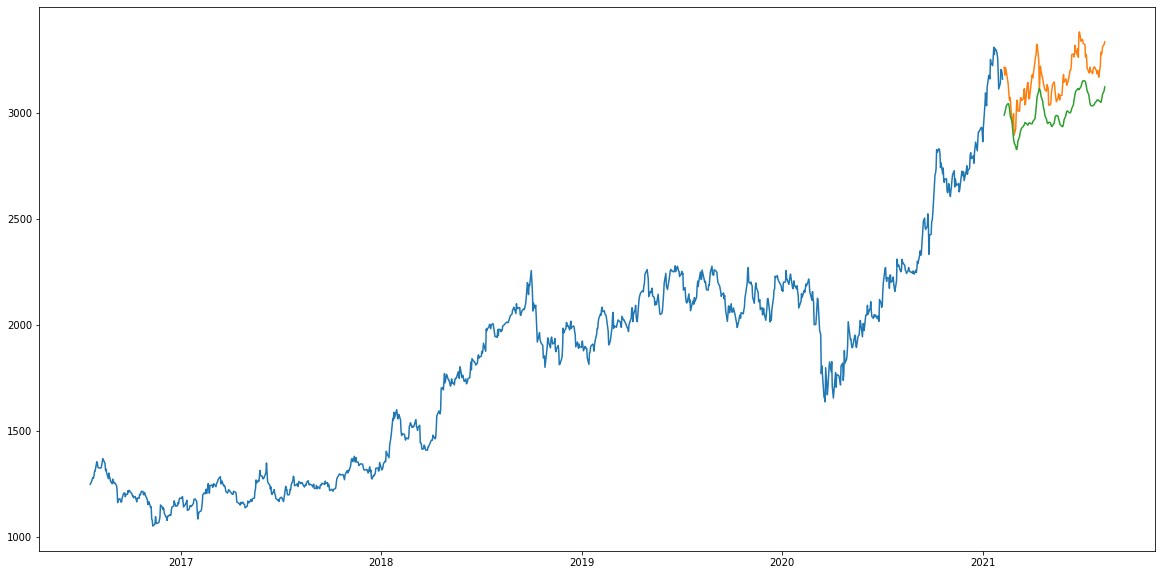

In [22]:
train_data=new_dataset[:trl]
valid_data=new_dataset[trl:]
valid_data['Predictions']=closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [23]:
from sklearn.metrics import mean_squared_error

mean_squared_error(valid_data['Close'],valid_data['Predictions'])

28221.788795963286

In [24]:
valid_data

,Close,Predictions
Date,,
2021-02-08,3214.100098,2988.644043
2021-02-09,3176.899902,2998.250000
2021-02-10,3213.300049,3008.560059
2021-02-11,3206.0,3021.307617
2021-02-12,3190.800049,3033.755859
...,...,...
2021-08-04,3273.949951,3056.522705
2021-08-05,3283.949951,3070.328613
2021-08-06,3309.800049,3086.527344


In [25]:
lstm_model.save('../data/lstm.h5')

In [26]:
# Normalizing the data just like we did for training the model
Last10Days=scaled_data[-look_back:]

# Changing the shape of the data to 3D
# Choosing TimeSteps as 10 because we have used the same for training
NumSamples=1
TimeSteps=60
NumFeatures=1
Last10Days=Last10Days.reshape(NumSamples,TimeSteps,NumFeatures)

#############################

# Making predictions on data
predicted_Price = lstm_model.predict(Last10Days)
predicted_Price = scaler.inverse_transform(predicted_Price)
predicted_Price

array([[3136.3982]], dtype=float32)

In [27]:
close_data = scaled_data.copy()
close_data = close_data.reshape((-1,1))

close_data = close_data.reshape((-1))

def predict(num_prediction, model):
    
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    
    prediction_list = prediction_list[look_back-1:]
    
    return prediction_list
    

def predict_dates(num_prediction):
    last_date = df['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

In [28]:
num_prediction = 90
forecast = predict(num_prediction, lstm_model)
forecast_dates = predict_dates(num_prediction)

In [29]:
f = forecast.reshape(1, -1)
f = scaler.inverse_transform(f)
f

array([[3333.89990234, 3136.39804235, 3127.84630829, 3100.12772301,
        3061.92763489, 3018.99132142, 2974.84539544, 2931.57671284,
        2890.35655188, 2851.79048271, 2816.13240036, 2783.41188887,
        2753.51408435, 2726.23037067, 2701.2961581 , 2678.41866182,
        2657.29676343, 2637.63962261, 2619.68418949, 2603.21101436,
        2587.86133854, 2573.29334825, 2559.22245328, 2545.42337042,
        2531.76373538, 2518.1493792 , 2504.50641122, 2490.78066347,
        2476.94157965, 2462.97777059, 2448.89548646, 2434.71431106,
        2420.46466178, 2406.18292839, 2391.9100841 , 2377.68821327,
        2363.55759464, 2349.55670136, 2335.71983982, 2322.07589959,
        2308.64863126, 2295.45692417, 2282.51397307, 2269.8283893 ,
        2257.40378404, 2245.24029619, 2233.33459234, 2221.68070012,
        2210.27111935, 2199.09584978, 2188.14475229, 2177.40713217,
        2166.87243361, 2156.52996191, 2146.36985573, 2136.38294816,
        2126.56118346, 2116.89629755, 2107.38405

In [30]:
f = f.reshape((-1))
fd = pd.DataFrame(f, index=forecast_dates)

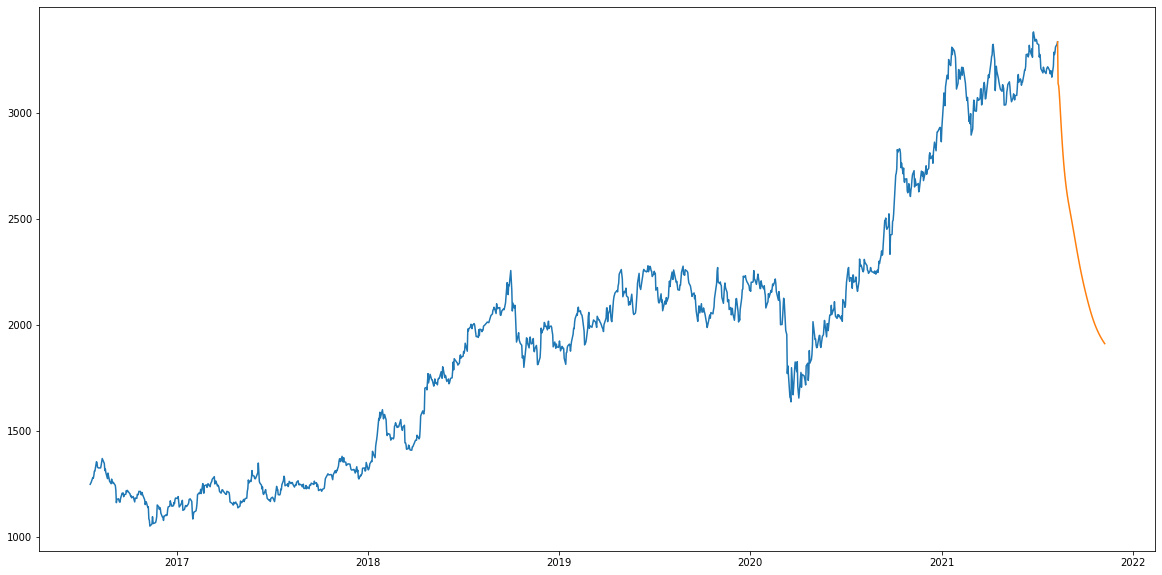

In [31]:
plt.plot(df['close'])
plt.plot(fd)